## Practice Questions


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

In [5]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'

In [6]:
ratings_df=pd.read_csv(URL)

In [7]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [9]:
ratings_df.shape

(463, 19)

### Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?


In [12]:
tenure_count = ratings_df[ratings_df.tenure == 'yes'].groupby('gender').agg({'tenure': 'count'}).reset_index()

In [11]:
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


### Question 1: Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?


In [13]:
## insert code here
##First filter for the tenured Professors
ratings_df=ratings_df[ratings_df['tenure']=='yes']
### we can use a groupby function for this
## first groupby to get the total sum
tenure_count = ratings_df.groupby('minority').agg({'tenure': 'count'}).reset_index()
# Find the percentage
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
##print to see
tenure_count

,minority,tenure,percentage
0,no,307,85.041551
1,yes,54,14.958449


### Question 2: Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.


In [14]:
## insert code here
## group by tenureship and find the mean and standard deviation for each group
ratings_df.groupby('tenure').agg({'age':['mean', 'std']}).reset_index()

tenure        age           
               mean        std
0    yes  47.850416  10.420056

### Question 3: Create a histogram for the age variable.


(array([41., 32., 48., 44., 35., 61., 30., 62.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <BarContainer object of 10 artists>)

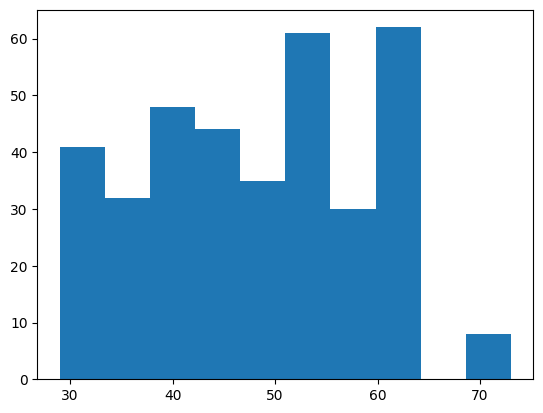

In [15]:
## insert code here
pyplot.hist(ratings_df['age'])

### Question 4: Create a bar plot for the gender variable.


Text(0.5, 1.0, 'Gender distribution bar plot')

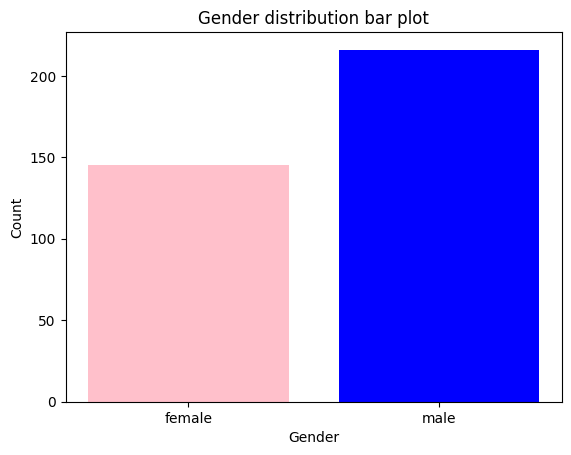

In [16]:
## insert code here
# Sort the value counts by index to align with the unique gender labels
sorted_counts = ratings_df.gender.value_counts().sort_index()

# Create the bar plot with sorted values
pyplot.bar(sorted_counts.index, sorted_counts.values, color=['pink', 'blue'])

# Add labels and title
pyplot.xlabel('Gender')
pyplot.ylabel('Count')
pyplot.title('Gender distribution bar plot')

### Question 5: What is the Median evaluation score for tenured Professors?


In [19]:
## insert code here
## you can index just tenured professors and find their median evaluation scores
ratings_df[ratings_df['tenure'] == 'yes']['eval'].median()

np.float64(4.0)